In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
from dataload import *
from model import *
from research import *
from helper_functions import *

DATA

In [3]:
calculer = True

In [4]:
if calculer == False:
  dataframe = pd.read_csv('../data/Allemagne/Bundesliga/D1_fullDataWithNotes.csv')
else:
  dataframe = pd.read_csv('../data/Allemagne/Bundesliga/D1 10:11.csv')
  i = 10
  while (i < 23):
    d2 = pd.read_csv(f"../data/Allemagne/Bundesliga/D1 {i}:{i + 1}.csv")
    dataframe = pd.concat([dataframe, d2])
    i += 1
  dataframe = arrange_data(dataframe, 'FTHG', 'FTAG', 'HA_Scored')

print(f"{dataframe.tail(20).to_string()}\n")

            Date       HomeTeam       AwayTeam  FTHG  FTAG  HA_Scored
4138  29/01/2023     Schalke 04        FC Koln     0     0          0
4139  29/01/2023     Leverkusen       Dortmund     0     2          0
4140  03/02/2023       Augsburg     Leverkusen     1     0          0
4141  04/02/2023         Bochum     Hoffenheim     5     2          1
4142  04/02/2023       Dortmund       Freiburg     5     1          1
4143  04/02/2023  Ein Frankfurt         Hertha     3     0          0
4144  04/02/2023        FC Koln     RB Leipzig     0     0          0
4145  04/02/2023   Union Berlin          Mainz     2     1          1
4146  04/02/2023     M'gladbach     Schalke 04     0     0          0
4147  05/02/2023      Stuttgart  Werder Bremen     0     2          0
4148  05/02/2023      Wolfsburg  Bayern Munich     2     4          1
4149  10/02/2023     Schalke 04      Wolfsburg     0     0          0
4150  11/02/2023  Bayern Munich         Bochum     3     0          0
4151  11/02/2023    

In [5]:
#display(dataframe.dtypes)

MODÈLE

In [6]:
if calculer != False:
    dataframe['Note'] = ''
    dataframe = get_notes(dataframe, 'HomeTeam', 'AwayTeam', 'Date', 'Note', 'HA_Scored', 1)

0 - 0.04198057499844161
1 - 0.04198057499844161
2 - 0.04198057499844161
3 - 0.04198057499844161
4 - 0.04198057499844161
5 - 0.04198057499844161
6 - 0.04198057499844161
7 - 0.0
8 - 0.0
9 - 0.037739231429581375
10 - 0.08396114999688321
11 - 0.08396114999688321
12 - 0.08396114999688321
13 - 0.037739231429581375
14 - 0.08396114999688321
15 - 0.06297086249766241
16 - 0.06297086249766241
17 - 0.04198057499844161
18 - 0.06297086249766241
19 - 0.06297086249766241
20 - 0.06085019071323229
21 - 0.11131345284939437
22 - 0.13866575570190554
23 - 0.11131345284939437
24 - 0.08396114999688321
25 - 0.06297086249766241
26 - 0.08820249356574345
27 - 0.104951437496104
28 - 0.06297086249766241
29 - 0.104951437496104
30 - 0.08396114999688321
31 - 0.08396114999688321
32 - 0.104951437496104
33 - 0.11131345284939437
34 - 0.11555479641825461
35 - 0.1344244121330453
36 - 0.17025940212327692
37 - 0.11131345284939437
38 - 0.08396114999688321
39 - 0.10707210928053415
40 - 0.19337036140692784
41 - 0.195491033191357

In [7]:
if calculer != False:
    print(f"{dataframe.tail(20).to_string()}\n")

            Date       HomeTeam       AwayTeam  FTHG  FTAG  HA_Scored      Note
4138  29/01/2023     Schalke 04        FC Koln     0     0          0  0.373312
4139  29/01/2023     Leverkusen       Dortmund     0     2          0   0.35889
4140  03/02/2023       Augsburg     Leverkusen     1     0          0  0.391919
4141  04/02/2023         Bochum     Hoffenheim     5     2          1  0.562538
4142  04/02/2023       Dortmund       Freiburg     5     1          1  0.429205
4143  04/02/2023  Ein Frankfurt         Hertha     3     0          0  0.475827
4144  04/02/2023        FC Koln     RB Leipzig     0     0          0  0.534244
4145  04/02/2023   Union Berlin          Mainz     2     1          1   0.54372
4146  04/02/2023     M'gladbach     Schalke 04     0     0          0  0.447251
4147  05/02/2023      Stuttgart  Werder Bremen     0     2          0  0.564487
4148  05/02/2023      Wolfsburg  Bayern Munich     2     4          1  0.460542
4149  10/02/2023     Schalke 04      Wol

In [8]:
if calculer != False:
    dtcsv = dataframe.to_csv(index=None)
    fichier = open("../data/Allemagne/Bundesliga/D1_fullDataWithNotes.csv", "w")
    fichier.write(dtcsv)
    fichier.close()
    print(dtcsv)

Date,HomeTeam,AwayTeam,FTHG,FTAG,HA_Scored,Note
20/08/10,Bayern Munich,Wolfsburg,2,1,1,0.04198057499844161
21/08/10,FC Koln,Kaiserslautern,1,3,1,0.04198057499844161
21/08/10,Freiburg,St Pauli,1,3,1,0.04198057499844161
21/08/10,Hamburg,Schalke 04,2,1,1,0.04198057499844161
21/08/10,Hannover,Ein Frankfurt,2,1,1,0.04198057499844161
21/08/10,Hoffenheim,Werder Bremen,4,1,1,0.04198057499844161
21/08/10,M'gladbach,Nurnberg,1,1,1,0.04198057499844161
22/08/10,Dortmund,Leverkusen,0,2,0,0.0
22/08/10,Mainz,Stuttgart,2,0,0,0.0
27/08/10,Kaiserslautern,Bayern Munich,2,0,0,0.037739231429581375
28/08/10,Ein Frankfurt,Hamburg,1,3,1,0.08396114999688321
28/08/10,Nurnberg,Freiburg,1,2,1,0.08396114999688321
28/08/10,Schalke 04,Hannover,1,2,1,0.08396114999688321
28/08/10,St Pauli,Hoffenheim,0,1,0,0.037739231429581375
28/08/10,Werder Bremen,FC Koln,4,2,1,0.08396114999688321
28/08/10,Wolfsburg,Mainz,3,4,1,0.06297086249766241
29/08/10,Leverkusen,M'gladbach,3,6,1,0.06297086249766241
29/08/10,Stuttgart,Dortmund,1,

RECHERCHE

In [9]:
lenMatchGroups = 29
data = get_data(dataframe, 'HA_Scored', 'Date', 'Note', lenMatchGroups, 53, 57, 1.4, 0.5, 42, 43, 1)

Note : 0.53
42% à chaque pari
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
Sous-résultat : 27/29, 93.1% de réussite
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
Sous-résultat : 25/29, 86.2% de réussite
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
Sous-résultat : 27/29, 93.1% de réussite
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
Sous-résultat : 25/29, 86.2% de réussite
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1]
Sous-résultat : 26/29, 89.65% de réussite
[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Sous-résultat : 27/29, 93.1% de réussite
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Sous-résultat : 27/29, 93.1% de réussite
[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

8
Note : 0.53


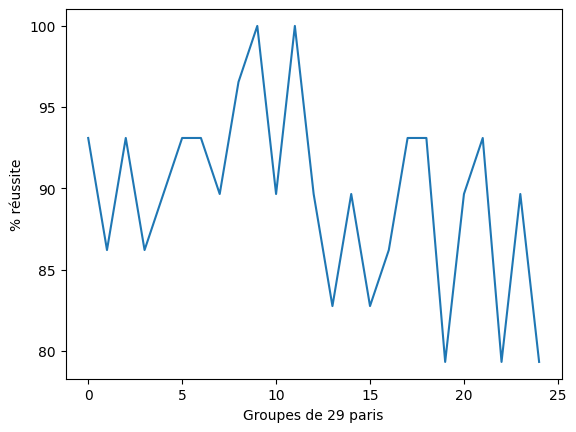

Note : 0.535


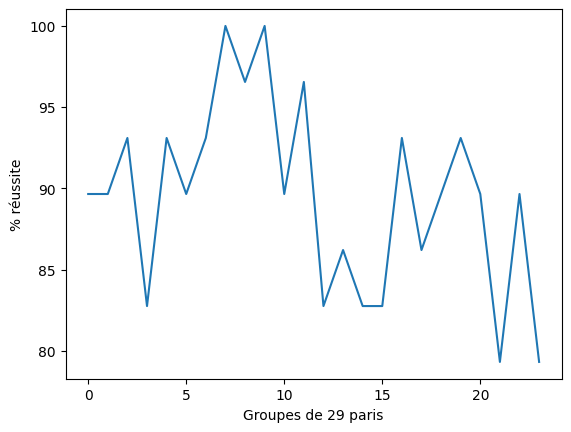

Note : 0.54


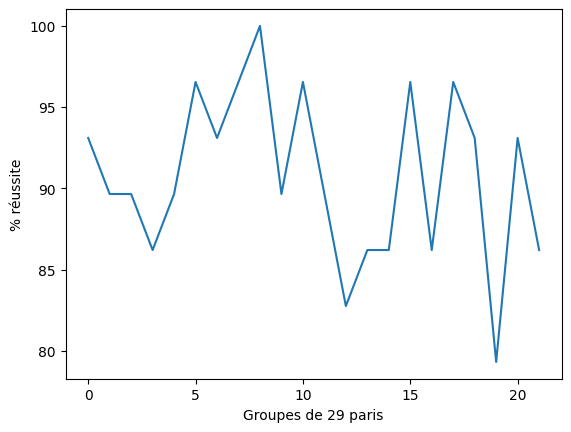

Note : 0.545


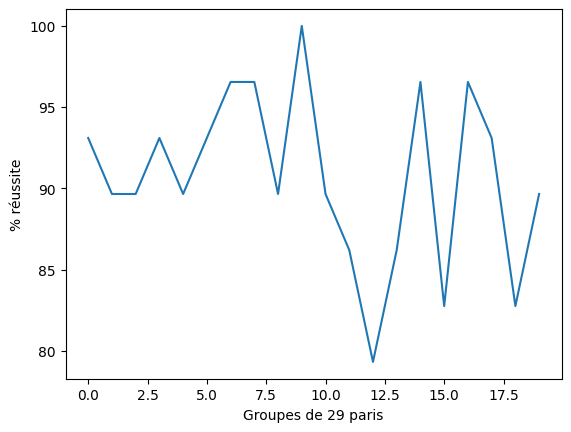

Note : 0.55


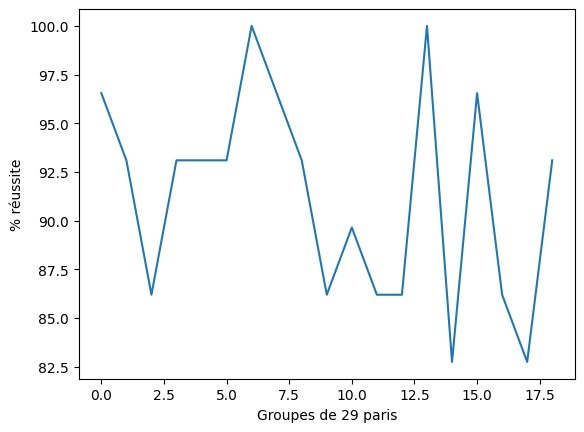

Note : 0.555


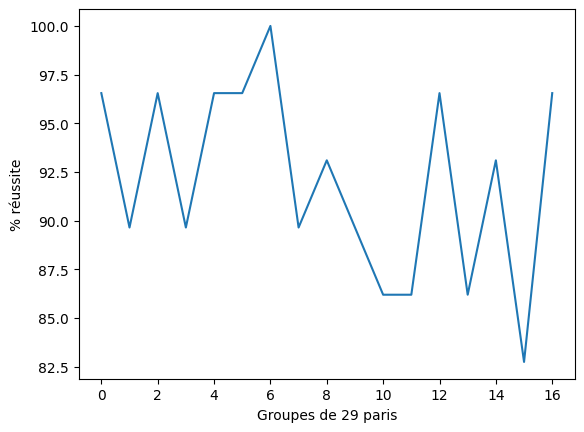

Note : 0.56


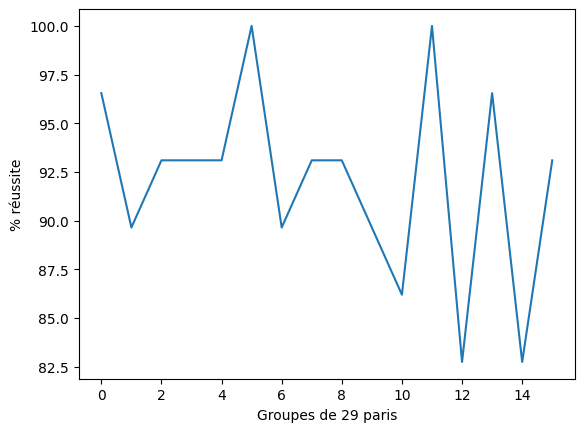

Note : 0.565


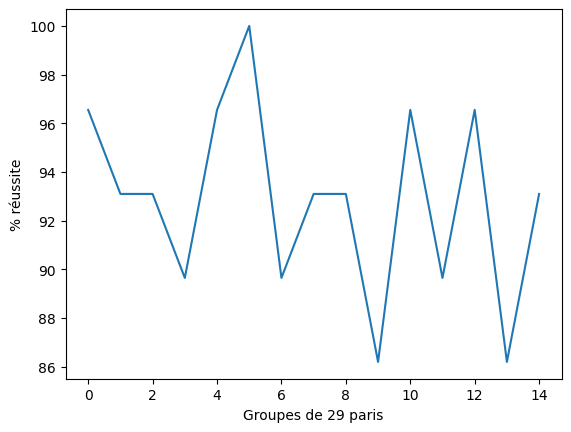

In [10]:
print(len(data))
get_plots(data, lenMatchGroups)

PARIS

In [11]:
arrayEquipes = get_equipes(dataframe, 0, 18, 'HomeTeam', 'AwayTeam')

print_array_equipes(arrayEquipes)

0 - FC Koln
1 - Ein Frankfurt
2 - Hertha
3 - M'gladbach
4 - RB Leipzig
5 - Union Berlin
6 - Werder Bremen
7 - Dortmund
8 - Mainz
9 - Augsburg
10 - Hoffenheim
11 - Leverkusen
12 - Freiburg
13 - Stuttgart
14 - Bayern Munich
15 - Bochum
16 - Schalke 04
17 - Wolfsburg


In [14]:
afficher_note_match(dataframe, arrayEquipes[9], arrayEquipes[10], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')
afficher_note_match(dataframe, arrayEquipes[3], arrayEquipes[14], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')
afficher_note_match(dataframe, arrayEquipes[17], arrayEquipes[4], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')
afficher_note_match(dataframe, arrayEquipes[15], arrayEquipes[12], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')
afficher_note_match(dataframe, arrayEquipes[13], arrayEquipes[0], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')
afficher_note_match(dataframe, arrayEquipes[1], arrayEquipes[6], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')
afficher_note_match(dataframe, arrayEquipes[5], arrayEquipes[16], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')
afficher_note_match(dataframe, arrayEquipes[7], arrayEquipes[2], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')
afficher_note_match(dataframe, arrayEquipes[11], arrayEquipes[8], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')

Match : Augsburg - Hoffenheim
Note : 0.5725556162957882

Match : M'gladbach - Bayern Munich
Note : 0.5840378192746631

Match : Wolfsburg - RB Leipzig
Note : 0.4679583346628208

Match : Bochum - Freiburg
Note : 0.4551868802218797

Match : Stuttgart - FC Koln
Note : 0.5012710928955153

Match : Ein Frankfurt - Werder Bremen
Note : 0.48675109798895494

Match : Union Berlin - Schalke 04
Note : 0.4115275572389409

Match : Dortmund - Hertha
Note : 0.4290031314399213

Match : Leverkusen - Mainz
Note : 0.46190417979159737



['Leverkusen', 'Mainz', 0.46190417979159737]

In [13]:
#print(calcul_somme(200, 0.42))